In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import date, timedelta, datetime

In [25]:
df = pd.read_csv("C:/Users/#asus/Documents/STATISTIKA ITS/MATA KULIAH/SEMESTER 6/DATA MINING/airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv")

#replacing numeric missing value with zero
df['Fatalities'].fillna(0, inplace = True)
df['Aboard'].fillna(0, inplace = True)
df['Ground'].fillna(0, inplace = True)

#creating new variable year
df['Year'] = pd.DatetimeIndex(df['Date']).year

#creating new variable survived, replacing its missing value to zero, and preventing negative values
df['Survived'] = df['Aboard'] - df['Fatalities']
df['Survived'].fillna(0, inplace = True)
df[df['Survived'] < 0] = 0

#replacing missing value in time to 00:00
df['Time'] = df['Time'].replace(np.nan, '00:00')

#replacing missing value in location, operator, flight #, type, registration, cn/ln, summary by its mode
df['Location'] = df['Location'].replace(np.nan, 'Moscow, Russia')
df['Operator'] = df['Operator'].replace(np.nan, 'Aeroflot')
df['Flight #'] = df['Flight #'].replace(np.nan, 'Unknown Status')
df['Flight #'] = df['Flight #'].replace('-', 'Unknown Status')
df['Route'] = df['Route'].replace(np.nan, 'Training')
df['Type'] = df['Type'].replace(np.nan, 'Douglas DC-3')
df['Registration'] = df['Registration'].replace(np.nan, 'Unknown')
df['cn/In'] = df['cn/In'].replace(np.nan, '178')
df['Summary'] = df['Summary'].replace(np.nan, 'Crash during takeoff')

#re-detecting missing values
df.isnull().any()

Date            False
Time            False
Location        False
Operator        False
Flight #        False
Route           False
Type            False
Registration    False
cn/In           False
Aboard          False
Fatalities      False
Ground          False
Summary         False
Year            False
Survived        False
dtype: bool

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 15 columns):
Date            5268 non-null object
Time            5268 non-null object
Location        5268 non-null object
Operator        5268 non-null object
Flight #        5268 non-null object
Route           5268 non-null object
Type            5268 non-null object
Registration    5268 non-null object
cn/In           5268 non-null object
Aboard          5268 non-null float64
Fatalities      5268 non-null float64
Ground          5268 non-null float64
Summary         5268 non-null object
Year            5268 non-null int64
Survived        5268 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 617.5+ KB


In [27]:
categorical = ['Location', 'Flight #', 'Route', 'Type', 'Registration']
dfcat = df[categorical].copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=categorical)
df_binary = encoder.fit_transform(dfcat)

df_binary.head()

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,...,Registration_4,Registration_5,Registration_6,Registration_7,Registration_8,Registration_9,Registration_10,Registration_11,Registration_12,Registration_13
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
X = df.drop(['Operator', 'Date', 'Time', 'cn/In', 'Summary', 'Year'], axis=1)
X1 = X.drop(categorical, axis=1)

In [34]:
X1

,Aboard,Fatalities,Ground,Survived
0,2.0,1.0,0.0,1.0
1,5.0,5.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,20.0,14.0,0.0,6.0
4,30.0,30.0,0.0,0.0
...,...,...,...,...
5263,112.0,98.0,2.0,14.0
5264,4.0,4.0,0.0,0.0
5265,228.0,228.0,0.0,0.0
5266,1.0,1.0,0.0,0.0


In [35]:
X_full = pd.concat([X1, df_binary], axis=1)

In [37]:
X_full.head()

,Aboard,Fatalities,Ground,Survived,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,...,Registration_4,Registration_5,Registration_6,Registration_7,Registration_8,Registration_9,Registration_10,Registration_11,Registration_12,Registration_13
0,2.0,1.0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.0,5.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,20.0,14.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,30.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
pca = PCA()
pca.fit(X_full)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_comp_chosen = np.argmax(cumsum >= 0.80)+1
print('The selected count of principal components to preserve 80% explained variance is',n_comp_chosen)

The selected count of principal components to preserve 80% explained variance is 2


In [41]:
model = PCA(n_components = 2)
model.fit(X_full)
X_red = model.transform(X_full)

In [42]:
model.explained_variance_ratio_

array([0.4424644 , 0.41693184])

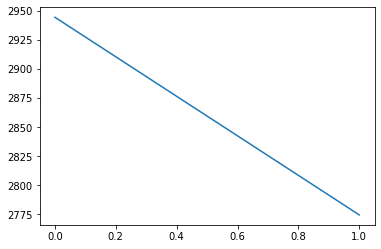

In [43]:
plt.plot(model.explained_variance_);

In [45]:
a=pd.DataFrame(np.transpose(model.components_))
a.columns=['PC1','PC2']
a

,PC1,PC2
0,3.956882e-01,-7.045700e-01
1,2.602111e-01,-4.332894e-01
2,8.702613e-01,4.921579e-01
3,1.354771e-01,-2.712806e-01
4,4.874716e-35,-1.010140e-34
...,...,...
64,-4.007861e-05,6.355417e-05
65,2.038114e-05,-6.894091e-05
66,2.843419e-06,5.755021e-06
67,-2.981102e-05,3.978306e-05


In [51]:
header_name = X_full.columns
header_name

Index(['Aboard', 'Fatalities', 'Ground', 'Survived', 'Location_0',
       'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Location_5',
       'Location_6', 'Location_7', 'Location_8', 'Location_9', 'Location_10',
       'Location_11', 'Location_12', 'Location_13', 'Flight #_0', 'Flight #_1',
       'Flight #_2', 'Flight #_3', 'Flight #_4', 'Flight #_5', 'Flight #_6',
       'Flight #_7', 'Flight #_8', 'Flight #_9', 'Flight #_10', 'Route_0',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Route_6',
       'Route_7', 'Route_8', 'Route_9', 'Route_10', 'Route_11', 'Route_12',
       'Type_0', 'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5', 'Type_6',
       'Type_7', 'Type_8', 'Type_9', 'Type_10', 'Type_11', 'Type_12',
       'Registration_0', 'Registration_1', 'Registration_2', 'Registration_3',
       'Registration_4', 'Registration_5', 'Registration_6', 'Registration_7',
       'Registration_8', 'Registration_9', 'Registration_10',
       'Registration_11', 'Reg

In [57]:
print('Arti 2 PC :')
for component in model.components_ :
    print('+'.join('%3f x %s'%(value,name)\
                  for value,name in zip(component,header_name)))
    print('')

Arti 2 PC :
0.395688 x Aboard+0.260211 x Fatalities+0.870261 x Ground+0.135477 x Survived+0.000000 x Location_0+-0.000041 x Location_1+0.000271 x Location_2+0.000113 x Location_3+0.000407 x Location_4+-0.000099 x Location_5+0.000144 x Location_6+-0.000181 x Location_7+-0.000232 x Location_8+0.000072 x Location_9+0.000310 x Location_10+0.000125 x Location_11+-0.000173 x Location_12+0.000144 x Location_13+-0.000000 x Flight #_0+0.000527 x Flight #_1+0.000751 x Flight #_2+0.001103 x Flight #_3+0.000827 x Flight #_4+0.000654 x Flight #_5+0.000762 x Flight #_6+0.000853 x Flight #_7+0.000824 x Flight #_8+0.000951 x Flight #_9+-0.000646 x Flight #_10+-0.000000 x Route_0+0.000596 x Route_1+0.000510 x Route_2+0.000767 x Route_3+0.000729 x Route_4+0.000271 x Route_5+0.000371 x Route_6+0.000680 x Route_7+0.000355 x Route_8+0.000642 x Route_9+0.000641 x Route_10+-0.000616 x Route_11+-0.000338 x Route_12+-0.000000 x Type_0+0.000407 x Type_1+0.000472 x Type_2+0.000282 x Type_3+-0.000139 x Type_4+0.0